In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
ordata_folder = 'Original_Data'
os.listdir(ordata_folder)

['AISLADE_OP.csv',
 'CON_PRI_OP.csv',
 'CUCHILL_OP.csv',
 'RECONEC_OP.csv',
 'Reporte Uraba2019_CAGMV1Est.xlsx',
 'TRANSFO_PT.csv']

In [4]:
%%time
AISLADE_OP = pd.read_csv(ordata_folder+'/AISLADE_OP.csv', encoding = "ISO-8859-1")
CON_PRI_OP = pd.read_csv(ordata_folder+'/CON_PRI_OP.csv', encoding = "ISO-8859-1")
CUCHILL_OP = pd.read_csv(ordata_folder+'/CUCHILL_OP.csv', encoding = "ISO-8859-1")
RECONEC_OP = pd.read_csv(ordata_folder+'/RECONEC_OP.csv', encoding = "ISO-8859-1")
TRANSFO_PT = pd.read_csv(ordata_folder+'/TRANSFO_PT.csv', encoding = "ISO-8859-1")

<string>:2: DtypeWarning: Columns (19,20,21,22,23,25) have mixed types.Specify dtype option on import or set low_memory=False.


Wall time: 1.4 s


In [5]:
# Shapes
print('AISLADE_OP:', AISLADE_OP.shape)
print('CON_PRI_OP: ', CON_PRI_OP.shape)
print('CUCHILL_OP: ', CUCHILL_OP.shape)
print('RECONEC_OP: ', RECONEC_OP.shape)
print('TRANSFO_PT: ',TRANSFO_PT.shape)

AISLADE_OP: (3871, 39)
CON_PRI_OP:  (44130, 42)
CUCHILL_OP:  (465, 39)
RECONEC_OP:  (144, 47)
TRANSFO_PT:  (13503, 44)


### AISLADE_OP: ¿aisladeros?

In [6]:
AISLADE_OP.dtypes

G3E_FID         int64
MERCADO        object
DEPARTAMEN     object
MUNICIPIO      object
COMUNA         object
BARRIO         object
CORREGIMIE    float64
LOCALIZACI     object
SUBESTACIO     object
CIRCUITO       object
CIRCUITO_S     object
EST_ESTABL     object
TIPO_AISLA     object
TIPO_RED       object
TENSION       float64
FASES          object
CAPACIDAD_    float64
FID_ANTERI      int64
COOR_X        float64
COOR_Y        float64
COOR_Z        float64
COOR_GPS_L    float64
COOR_GPS_1    float64
FECHA_COLO     object
FECHA_MODI     object
CLASIFICAC     object
NODO1_ID        int64
NODO2_ID        int64
EST_OPERAT     object
TIPO_RED_C     object
SUBESTACI1     object
CIRCUITO_C     object
TENSION_CO    float64
FASES_CONN     object
UBICACION_     object
FECHA_ACTU     object
NUMERO_FAS     object
MUNICIPIO_      int64
SUBREGION      object
dtype: object

In [7]:
AISLADE_OP.head()

,G3E_FID,MERCADO,DEPARTAMEN,MUNICIPIO,COMUNA,BARRIO,CORREGIMIE,LOCALIZACI,SUBESTACIO,CIRCUITO,CIRCUITO_S,EST_ESTABL,TIPO_AISLA,TIPO_RED,TENSION,FASES,CAPACIDAD_,FID_ANTERI,COOR_X,COOR_Y,COOR_Z,COOR_GPS_L,COOR_GPS_1,FECHA_COLO,FECHA_MODI,CLASIFICAC,NODO1_ID,NODO2_ID,EST_OPERAT,TIPO_RED_C,SUBESTACI1,CIRCUITO_C,TENSION_CO,FASES_CONN,UBICACION_,FECHA_ACTU,NUMERO_FAS,MUNICIPIO_,SUBREGION
0,4115654,REGIONAL,ANTIOQUIA,TURBO,NaN,NaN,NaN,AEREO,CHIGORODO,403-16,403-16,CLOSED,NORMAL,PRIMARIA,7.621,T,25.0,4115654,711307.605,1319620.280,NaN,7.47868,-76.69208,12/6/2007,10/18/2019,RURAL,51148589,51148590,CLOSED,PRIMARIA,CHIGORODO,403-16,7.621,T,4115654-5,4/16/2018,1F,5837,APARTADO
1,4115657,REGIONAL,ANTIOQUIA,CHIGORODÓ,NaN,NaN,NaN,AEREO,CHIGORODO,403-16,403-16,CLOSED,NORMAL,PRIMARIA,7.621,R,10.0,4115657,718684.922,1330213.947,NaN,7.57476,-76.62587,12/6/2007,4/24/2020,RURAL,47636661,51148627,CLOSED,PRIMARIA,CHIGORODO,403-16,7.621,R,4115657-5,4/16/2018,1F,5172,APARTADO
2,4115659,REGIONAL,ANTIOQUIA,CHIGORODÓ,NaN,NaN,NaN,AEREO,CHIGORODO,403-16,403-16,CLOSED,NORMAL,PRIMARIA,7.621,S,10.0,4115659,719917.986,1328245.759,NaN,7.55712,-76.61513,12/6/2007,4/24/2020,RURAL,57368114,57742128,CLOSED,PRIMARIA,CHIGORODO,403-16,7.621,S,4115659-5,4/16/2018,1F,5172,APARTADO
3,4115660,REGIONAL,ANTIOQUIA,CHIGORODÓ,NaN,NaN,NaN,AEREO,CAUCHERAS,404-12,404-12,CLOSED,NORMAL,PRIMARIA,7.621,R,10.0,4115660,721734.197,1324264.546,NaN,7.52118,-76.59795,12/6/2007,7/7/2018,RURAL,47639963,51148644,CLOSED,PRIMARIA,CAUCHERAS,404-12,7.621,R,4115660-5,4/16/2018,1F,5172,APARTADO
4,4115661,REGIONAL,ANTIOQUIA,CHIGORODÓ,NaN,NaN,NaN,AEREO,CAUCHERAS,404-12,404-12,CLOSED,NORMAL,PRIMARIA,7.621,R,6.0,4115661,722058.432,1323960.839,NaN,7.51845,-76.59500,12/6/2007,7/7/2018,RURAL,51148646,51148647,CLOSED,PRIMARIA,CAUCHERAS,404-12,7.621,R,4115661-5,4/16/2018,1F,5172,APARTADO


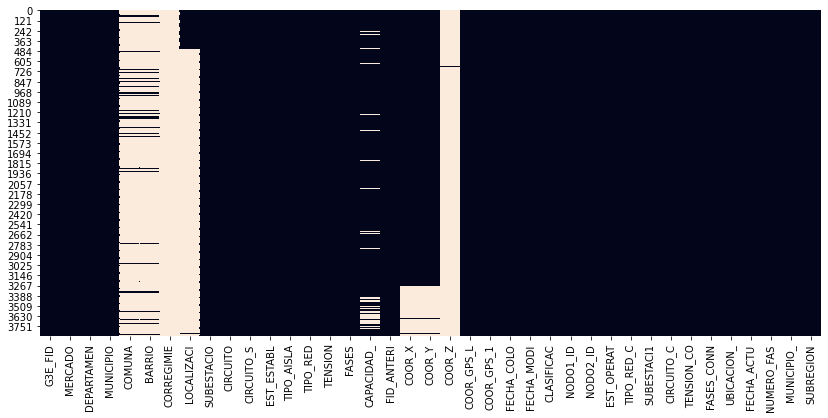

In [8]:
plt.figure(figsize=(14,6))
sns.heatmap(AISLADE_OP.isna(), cbar=False)

In [9]:
for var in AISLADE_OP.columns:
    print('\n ---', var)
    print(AISLADE_OP[var].value_counts())


 --- G3E_FID
13086776    1
14216374    1
12731013    1
12069504    1
12399231    1
           ..
12006015    1
12916020    1
13100338    1
14097713    1
4116482     1
Name: G3E_FID, Length: 3871, dtype: int64

 --- MERCADO
REGIONAL         3865
METROPOLITANO       6
Name: MERCADO, dtype: int64

 --- DEPARTAMEN
ANTIOQUIA    3871
Name: DEPARTAMEN, dtype: int64

 --- MUNICIPIO
TURBO                 985
NECOCLÍ               559
APARTADÓ              518
ARBOLETES             472
SAN PEDRO DE URABÁ    359
CHIGORODÓ             315
CAREPA                308
SAN JUAN DE URABÁ     220
MUTATÁ                135
Name: MUNICIPIO, dtype: int64

 --- COMUNA
APARTADÓ              125
TURBO                 110
CHIGORODÓ              50
CAREPA                 32
NECOCLÍ                23
SAN PEDRO DE URABÁ     18
ARBOLETES              12
Name: COMUNA, dtype: int64

 --- BARRIO
CHIGORODO        50
OBRERO           22
FUNDADORES       15
CASANOVA         14
EL CENTRO        13
                 ..
EL 

In [10]:
print('Different Circuit variables:')
print((AISLADE_OP.CIRCUITO == AISLADE_OP.CIRCUITO_S).all())
print((AISLADE_OP.CIRCUITO == AISLADE_OP.CIRCUITO_C).all())

print('Different Substations variables:')
print((AISLADE_OP.SUBESTACIO == AISLADE_OP.SUBESTACI1).all())

print('Different \"Fases\" variables:')
print((AISLADE_OP.FASES == AISLADE_OP.FASES_CONN).all())

print('Different \"TipoRed\" variables:')
print((AISLADE_OP.TIPO_RED == AISLADE_OP.TIPO_RED_C).all())

print('Different \"Tension\" variables:')
print((AISLADE_OP.TENSION == AISLADE_OP.TENSION_CO).all())

print('Different Municipality variables:')
print((AISLADE_OP.MUNICIPIO == AISLADE_OP.MUNICIPIO_).all())

Different Circuit variables:
False
True
Different Substations variables:
True
Different "Fases" variables:
True
Different "TipoRed" variables:
True
Different "Tension" variables:
True
Different Municipality variables:
False


In [11]:
AISLADE_OP.columns

Index(['G3E_FID', 'MERCADO', 'DEPARTAMEN', 'MUNICIPIO', 'COMUNA', 'BARRIO',
       'CORREGIMIE', 'LOCALIZACI', 'SUBESTACIO', 'CIRCUITO', 'CIRCUITO_S',
       'EST_ESTABL', 'TIPO_AISLA', 'TIPO_RED', 'TENSION', 'FASES',
       'CAPACIDAD_', 'FID_ANTERI', 'COOR_X', 'COOR_Y', 'COOR_Z', 'COOR_GPS_L',
       'COOR_GPS_1', 'FECHA_COLO', 'FECHA_MODI', 'CLASIFICAC', 'NODO1_ID',
       'NODO2_ID', 'EST_OPERAT', 'TIPO_RED_C', 'SUBESTACI1', 'CIRCUITO_C',
       'TENSION_CO', 'FASES_CONN', 'UBICACION_', 'FECHA_ACTU', 'NUMERO_FAS',
       'MUNICIPIO_', 'SUBREGION'],
      dtype='object')

**Drop variables**

Se eliminan variables con muchos missings, variables diferentes con mismos valores, `UBICACION_C` y `FID_ANTERI` por carecer de interpretación y `MERCADO` porque solo toma dos valores y uno de ellos solo tiene 6 observaciones.

In [12]:
AISLADE_OP = AISLADE_OP.drop(columns=['DEPARTAMEN', 'COMUNA', 'BARRIO', 'CORREGIMIE', 'LOCALIZACI', 'FID_ANTERI',
                                     'COOR_X', 'COOR_Y', 'COOR_Z', 'CIRCUITO_C', 'MERCADO', 'EST_OPERAT', 'CAPACIDAD_',
                                     'SUBESTACI1', 'FASES_CONN', 'TIPO_RED_C', 'TENSION_CO', 'UBICACION_'])
AISLADE_OP.rename(columns={'COOR_GPS_L':'LATITUDE', 'COOR_GPS_1':'LONGITUDE', 'MUNICIPIO_':'MUNICIPIO_CODE'}, inplace=True)

In [13]:
AISLADE_OP.describe()

,G3E_FID,TENSION,LATITUDE,LONGITUDE,NODO1_ID,NODO2_ID,MUNICIPIO_CODE
count,3.871000e+03,3871.000000,3871.000000,3871.000000,3.871000e+03,3.871000e+03,3871.000000
mean,1.203349e+07,8.795031,8.154909,-76.585280,5.471433e+07,5.704120e+07,5437.537587
std,3.376837e+06,2.573042,0.377886,0.134589,4.353643e+06,2.085580e+06,316.175140
min,4.115654e+06,7.621000,7.199800,-76.954260,4.714627e+07,4.714540e+07,5045.000000
25%,1.251995e+07,7.621000,7.875310,-76.685785,4.767423e+07,5.734909e+07,5051.000000
50%,1.287657e+07,7.621000,8.127650,-76.626350,5.729771e+07,5.741971e+07,5490.000000
75%,1.300656e+07,7.621000,8.489980,-76.485800,5.742472e+07,5.749410e+07,5837.000000
max,3.131366e+07,44.000000,8.859900,-76.221070,7.075883e+07,7.075884e+07,5837.000000


In [14]:
#Primary key
AISLADE_OP.G3E_FID.value_counts().value_counts()

1    3871
Name: G3E_FID, dtype: int64

In [15]:
AISLADE_OP.shape

(3871, 21)

In [16]:
AISLADE_OP.isnull().sum()
# interpolar capacidad

G3E_FID           0
MUNICIPIO         0
SUBESTACIO        0
CIRCUITO          0
CIRCUITO_S        0
EST_ESTABL        0
TIPO_AISLA        0
TIPO_RED          0
TENSION           0
FASES             0
LATITUDE          0
LONGITUDE         0
FECHA_COLO        0
FECHA_MODI        0
CLASIFICAC        0
NODO1_ID          0
NODO2_ID          0
FECHA_ACTU        0
NUMERO_FAS        0
MUNICIPIO_CODE    0
SUBREGION         0
dtype: int64

In [17]:
# Dates to date time
display(AISLADE_OP[['FECHA_ACTU','FECHA_MODI','FECHA_COLO']].sample(3))
AISLADE_OP[['FECHA_ACTU','FECHA_MODI','FECHA_COLO']] = AISLADE_OP[['FECHA_ACTU','FECHA_MODI','FECHA_COLO']].apply(pd.to_datetime)

,FECHA_ACTU,FECHA_MODI,FECHA_COLO
3153,4/5/2018,1/26/2016,6/11/2013
1559,4/16/2018,2/10/2016,12/17/2011
271,4/16/2018,4/4/2017,12/6/2007


In [18]:
# #Center in Apartadó, Antioquia: (7.88299, -76.62587)
# antioquia_map2 = folium.Map(location=[7.88299, -76.62587],
#                         zoom_start=9,
#                         tiles='openstreetmap')

# for i in range(0,len(df)):
#     marker = folium.CircleMarker(location=[ df["Latitude"][i], df["Longitude"][i] ],
#                                  radius=2,
#                                  color= priority_col_dict[df.Priority[i]],
#                                  fill=True)
#     marker.add_to(antioquia_map2)


# antioquia_map2

### CON_PRI_OP: ¿Conexión primaria?

In [19]:
CON_PRI_OP.dtypes

G3E_FID         int64
MERCADO        object
DEPARTAMEN     object
MUNICIPIO      object
COMUNA         object
BARRIO         object
SUBESTACIO     object
LOCALIZACI     object
CIRCUITO       object
TIPO_RED       object
TENSION       float64
FASES          object
CALIBRE        object
MATERIAL       object
AISLAMIENT     object
USO            object
CALIBRE_NE     object
TIPO_CONDU     object
SOBREPUEST     object
TIPO_CABLE     object
TIPO_AISL1     object
MATERIAL_N     object
AISLAMIEN1     object
FID_ANTERI     object
FECHA_COLO     object
FECHA_ESTI     object
FECHA_INST     object
FECHA_MODI     object
CLASIFICAC     object
TIPO_PROYE     object
NODO1_ID        int64
NODO2_ID        int64
TIPO_RED_C     object
CODIGO_CON    float64
SUBESTACI1     object
LOCALIZAC1     object
CIRCUITO_C     object
TENSION_CO    float64
FASES_CONN     object
TIPO_LINEA     object
LONGITUD_C    float64
FECHA_ACTU     object
dtype: object

In [20]:
CON_PRI_OP.head()

,G3E_FID,MERCADO,DEPARTAMEN,MUNICIPIO,COMUNA,BARRIO,SUBESTACIO,LOCALIZACI,CIRCUITO,TIPO_RED,TENSION,FASES,CALIBRE,MATERIAL,AISLAMIENT,USO,CALIBRE_NE,TIPO_CONDU,SOBREPUEST,TIPO_CABLE,TIPO_AISL1,MATERIAL_N,AISLAMIEN1,FID_ANTERI,FECHA_COLO,FECHA_ESTI,FECHA_INST,FECHA_MODI,CLASIFICAC,TIPO_PROYE,NODO1_ID,NODO2_ID,TIPO_RED_C,CODIGO_CON,SUBESTACI1,LOCALIZAC1,CIRCUITO_C,TENSION_CO,FASES_CONN,TIPO_LINEA,LONGITUD_C,FECHA_ACTU
0,2245649,REGIONAL,ANTIOQUIA,APARTADÓ,NaN,NaN,APARTADO,AEREO,401-41,SUBTRANSMISION,44.0,TSR,4/0,ACSR,DESNUDO,NORMAL,1/0,NaN,NO,NaN,NaN,NaN,NaN,2245649,12/18/2007,NaN,12/18/2007,7/15/2019,RURAL,NaN,57375777,57711679,SUBTRANSMISION,NaN,APARTADO,AEREO,401-41,44.0,TSR,A_4/0_1/0_ACSR_DES_3_44,118.62,5/12/2020
1,2245651,REGIONAL,ANTIOQUIA,APARTADÓ,NaN,NaN,APARTADO,AEREO,401-41,SUBTRANSMISION,44.0,TSR,266.8,ACSR,DESNUDO,NORMAL,1/0,NaN,NO,NaN,NaN,NaN,NaN,2245651,12/18/2007,NaN,3/4/2016,7/15/2019,RURAL,NaN,57375778,47143597,SUBTRANSMISION,NaN,APARTADO,AEREO,401-41,44.0,TSR,A_266.8_1/0_ACSR_DES_3_44,136.78,5/12/2020
2,2245653,REGIONAL,ANTIOQUIA,APARTADÓ,NaN,NaN,APARTADO,AEREO,401-41,SUBTRANSMISION,44.0,TSR,4/0,ACSR,DESNUDO,NORMAL,1/0,NaN,NO,NaN,NaN,NaN,NaN,2245653,12/18/2007,NaN,12/18/2007,5/29/2019,RURAL,NaN,47143590,57947690,SUBTRANSMISION,NaN,APARTADO,AEREO,401-41,44.0,TSR,A_4/0_1/0_ACSR_DES_3_44,62.91,5/17/2019
3,2245654,REGIONAL,ANTIOQUIA,APARTADÓ,NaN,NaN,APARTADO,AEREO,401-41,SUBTRANSMISION,44.0,TSR,4/0,ACSR,DESNUDO,NORMAL,1/0,NaN,NO,NaN,NaN,NaN,NaN,2245654,12/18/2007,NaN,12/18/2007,7/7/2018,RURAL,NaN,57426188,57426189,SUBTRANSMISION,NaN,APARTADO,AEREO,401-41,44.0,TSR,A_4/0_1/0_ACSR_DES_3_44,118.01,5/17/2019
4,2245655,REGIONAL,ANTIOQUIA,APARTADÓ,NaN,NaN,APARTADO,AEREO,401-41,SUBTRANSMISION,44.0,TSR,4/0,ACSR,DESNUDO,NORMAL,1/0,NaN,NO,NaN,NaN,NaN,NaN,2245655,12/18/2007,NaN,12/18/2007,5/29/2019,RURAL,NaN,57426185,57426187,SUBTRANSMISION,NaN,APARTADO,AEREO,401-41,44.0,TSR,A_4/0_1/0_ACSR_DES_3_44,19.15,5/17/2019


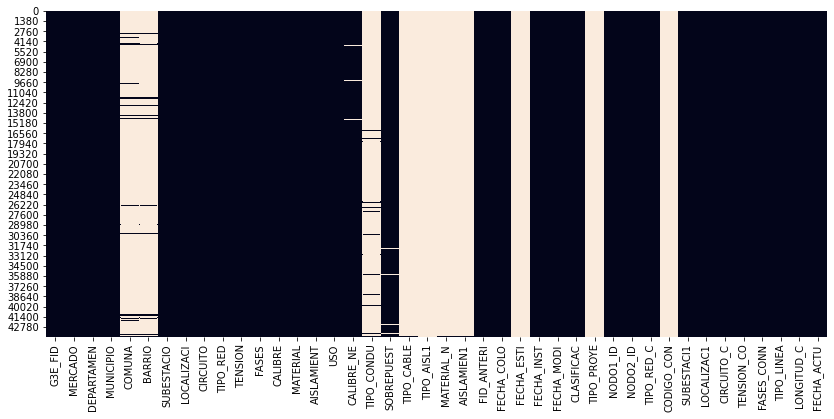

In [21]:
plt.figure(figsize=(14,6))
sns.heatmap(CON_PRI_OP.isna(), cbar=False)

In [22]:
CON_PRI_OP.columns

Index(['G3E_FID', 'MERCADO', 'DEPARTAMEN', 'MUNICIPIO', 'COMUNA', 'BARRIO',
       'SUBESTACIO', 'LOCALIZACI', 'CIRCUITO', 'TIPO_RED', 'TENSION', 'FASES',
       'CALIBRE', 'MATERIAL', 'AISLAMIENT', 'USO', 'CALIBRE_NE', 'TIPO_CONDU',
       'SOBREPUEST', 'TIPO_CABLE', 'TIPO_AISL1', 'MATERIAL_N', 'AISLAMIEN1',
       'FID_ANTERI', 'FECHA_COLO', 'FECHA_ESTI', 'FECHA_INST', 'FECHA_MODI',
       'CLASIFICAC', 'TIPO_PROYE', 'NODO1_ID', 'NODO2_ID', 'TIPO_RED_C',
       'CODIGO_CON', 'SUBESTACI1', 'LOCALIZAC1', 'CIRCUITO_C', 'TENSION_CO',
       'FASES_CONN', 'TIPO_LINEA', 'LONGITUD_C', 'FECHA_ACTU'],
      dtype='object')

In [23]:
print('Is \"Tipo_RED\" equal to \"Tipo_RED_C\" variable?', (CON_PRI_OP.TIPO_RED==CON_PRI_OP.TIPO_RED_C).all())
print('Is \"SUBESTACIO\" equal to \"SUBESTACI1\" variable?', (CON_PRI_OP.SUBESTACIO==CON_PRI_OP.SUBESTACI1).all())
print('Is \"LOCALIZACI\" equal to \"LOCALIZAC1\" variable?', (CON_PRI_OP.LOCALIZACI==CON_PRI_OP.LOCALIZAC1).all())
print('Is \"CIRCUITO\" equal to \"CIRCUITO_C\" variable?', (CON_PRI_OP.CIRCUITO==CON_PRI_OP.CIRCUITO_C).all())
print('Is \"TENSION\" equal to \"TENSION_CO\" variable?', (CON_PRI_OP.TENSION==CON_PRI_OP.TENSION_CO).all())
print('Is \"FASES\" equal to \"FASES_CONN\" variable?', (CON_PRI_OP.FASES==CON_PRI_OP.FASES_CONN).all())

Is "Tipo_RED" equal to "Tipo_RED_C" variable? True
Is "SUBESTACIO" equal to "SUBESTACI1" variable? True
Is "LOCALIZACI" equal to "LOCALIZAC1" variable? True
Is "CIRCUITO" equal to "CIRCUITO_C" variable? True
Is "TENSION" equal to "TENSION_CO" variable? True
Is "FASES" equal to "FASES_CONN" variable? True


In [24]:
for var in CON_PRI_OP.columns:
    print('\n ---', var)
    print(CON_PRI_OP[var].value_counts())


 --- G3E_FID
13748643    1
12940566    1
12777822    1
12957283    1
12907828    1
           ..
12642888    1
13144647    1
12683844    1
12692032    1
12912641    1
Name: G3E_FID, Length: 44130, dtype: int64

 --- MERCADO
REGIONAL         44106
METROPOLITANO       24
Name: MERCADO, dtype: int64

 --- DEPARTAMEN
ANTIOQUIA          44084
CÓRDOBA               38
CHOCÓ                  7
SIN INFORMACION        1
Name: DEPARTAMEN, dtype: int64

 --- MUNICIPIO
TURBO                 12676
NECOCLÍ                6119
APARTADÓ               5191
CHIGORODÓ              4217
SAN PEDRO DE URABÁ     3934
ARBOLETES              3682
CAREPA                 3532
MUTATÁ                 2741
SAN JUAN DE URABÁ      1989
VALENCIA                 22
LOS CÓRDOBAS              8
RIOSUCIO                  7
MONTERÍA                  6
CANALETE                  2
DABEIBA                   2
SIN INFORMACION           1
TIERRALTA                 1
Name: MUNICIPIO, dtype: int64

 --- COMUNA
APARTADÓ          

Drop variables

Razones similares a los aisladeros.

In [25]:
CON_PRI_OP = CON_PRI_OP.drop(columns = ['MERCADO', 'DEPARTAMEN', 'COMUNA', 'BARRIO', 'TIPO_CONDU', 'LOCALIZAC1',
                                        'TIPO_CABLE', 'TIPO_AISL1', 'MATERIAL_N', 'AISLAMIEN1', 'FECHA_ESTI',
                                        'TIPO_PROYE', 'CODIGO_CON', 'FID_ANTERI', 'TIPO_RED_C', 'SUBESTACI1',
                                        'TENSION_CO', 'FASES_CONN']  )

In [26]:
CON_PRI_OP.isnull().sum()

G3E_FID         0
MUNICIPIO       0
SUBESTACIO      0
LOCALIZACI      0
CIRCUITO        0
TIPO_RED        0
TENSION         0
FASES           0
CALIBRE         0
MATERIAL        0
AISLAMIENT      3
USO             7
CALIBRE_NE    185
SOBREPUEST     95
FECHA_COLO      4
FECHA_INST      0
FECHA_MODI     53
CLASIFICAC      0
NODO1_ID        0
NODO2_ID        0
CIRCUITO_C      0
TIPO_LINEA      0
LONGITUD_C      0
FECHA_ACTU      2
dtype: int64

In [27]:
CON_PRI_OP.describe()

,G3E_FID,TENSION,NODO1_ID,NODO2_ID,LONGITUD_C
count,4.413000e+04,44130.000000,4.413000e+04,4.413000e+04,44130.000000
mean,1.009314e+07,11.125129,5.529151e+07,5.447902e+07,143.732876
std,4.537574e+06,8.616985,4.161439e+06,6.713215e+06,119.458542
min,2.245649e+06,7.621000,4.714347e+07,0.000000e+00,1.210000
25%,4.090406e+06,7.621000,5.718643e+07,5.114476e+07,76.770000
50%,1.251695e+07,7.621000,5.739254e+07,5.736825e+07,104.750000
75%,1.292873e+07,13.200000,5.744592e+07,5.744339e+07,172.230000
max,3.132545e+07,44.000000,7.076256e+07,7.076268e+07,2620.420000


In [28]:
CON_PRI_OP.G3E_FID.value_counts().value_counts()

1    44130
Name: G3E_FID, dtype: int64

In [29]:
# Date to format
CON_PRI_OP[['FECHA_ACTU','FECHA_COLO','FECHA_INST','FECHA_MODI']] = CON_PRI_OP[['FECHA_ACTU','FECHA_COLO','FECHA_INST','FECHA_MODI']].\
                                                                    apply(pd.to_datetime)

### CUCHILL_OP: ¿Cuchillas?

In [30]:
CUCHILL_OP.dtypes

G3E_FID         int64
DEPARTAMEN     object
MUNICIPIO      object
COMUNA         object
BARRIO         object
VEREDA         object
SUBESTACIO     object
CIRCUITO       object
CIRCUITO_S     object
EST_ESTABL     object
CODIGO         object
TIPO_RED       object
TENSION       float64
FASES          object
USO            object
FID_ANTERI      int64
COOR_X        float64
COOR_Y        float64
COOR_Z        float64
COOR_GPS_L    float64
COOR_GPS_1    float64
FECHA_COLO     object
FECHA_INST     object
FECHA_MODI     object
CLASIFICAC     object
NODO1_ID        int64
NODO2_ID        int64
EST_OPERAT     object
TIPO_RED_C     object
SUBESTACI1     object
CIRCUITO_C     object
TENSION_CO    float64
FASES_CONN     object
CAPACIDAD_      int64
FECHA_ACTU     object
NUMERO_FAS     object
DEPARTAME1      int64
MUNICIPIO_      int64
SUBREGION      object
dtype: object

In [31]:
CUCHILL_OP.head()

,G3E_FID,DEPARTAMEN,MUNICIPIO,COMUNA,BARRIO,VEREDA,SUBESTACIO,CIRCUITO,CIRCUITO_S,EST_ESTABL,CODIGO,TIPO_RED,TENSION,FASES,USO,FID_ANTERI,COOR_X,COOR_Y,COOR_Z,COOR_GPS_L,COOR_GPS_1,FECHA_COLO,FECHA_INST,FECHA_MODI,CLASIFICAC,NODO1_ID,NODO2_ID,EST_OPERAT,TIPO_RED_C,SUBESTACI1,CIRCUITO_C,TENSION_CO,FASES_CONN,CAPACIDAD_,FECHA_ACTU,NUMERO_FAS,DEPARTAME1,MUNICIPIO_,SUBREGION
0,6001428,ANTIOQUIA,TURBO,NaN,NaN,NaN,URABA,411-42,411-42,CLOSED,C4401,SUBTRANSMISION,44.0,RST,SALIDA DE CTO,6001428,715893.783,1383082.090,NaN,8.05216,-76.65406,1/15/2008,1/15/2008,3/13/2020,RURAL,0,58013386,CLOSED,SUBTRANSMISION,URABA,411-42,44.0,RST,600,3/6/2018,3F,5,5837,TURBO
1,6001437,ANTIOQUIA,TURBO,NaN,NaN,NaN,URABA,411-43,411-43,CLOSED,C4402,SUBTRANSMISION,44.0,RST,SALIDA DE CTO,6001437,715893.783,1383087.890,NaN,8.05222,-76.65406,1/15/2008,1/15/2008,7/30/2014,RURAL,51140744,51140746,CLOSED,SUBTRANSMISION,URABA,411-43,44.0,RST,600,2/5/2018,3F,5,5837,TURBO
2,6001440,ANTIOQUIA,TURBO,NaN,NaN,NaN,URABA,411-44,411-44,CLOSED,C4403,SUBTRANSMISION,44.0,TSR,SALIDA DE CTO,6001440,715893.678,1383088.488,NaN,8.05222,-76.65406,1/15/2008,1/15/2008,7/30/2014,RURAL,51140749,51140751,CLOSED,SUBTRANSMISION,URABA,411-44,44.0,TSR,600,12/19/2017,3F,5,5837,TURBO
3,6001692,ANTIOQUIA,APARTADÓ,NaN,NaN,NaN,APARTADO,401-41,401-41,CLOSED,C4396,SUBTRANSMISION,44.0,TSR,SALIDA DE CTO,6001692,720569.258,1363392.161,NaN,7.87457,-76.61059,1/17/2008,1/17/2008,7/7/2018,URBANO,51141268,51141269,CLOSED,SUBTRANSMISION,APARTADO,401-41,44.0,TSR,600,4/10/2018,3F,5,5045,APARTADO
4,6001708,ANTIOQUIA,APARTADÓ,NaN,NaN,NaN,APARTADO,401-11,401-11,CLOSED,C41180,PRIMARIA,13.2,RST,SALIDA DE CTO,6001708,720629.752,1363453.907,NaN,7.87513,-76.61005,1/17/2008,1/17/2008,7/7/2018,URBANO,57526396,57374255,CLOSED,PRIMARIA,APARTADO,401-11,13.2,RST,600,4/16/2018,3F,5,5045,APARTADO


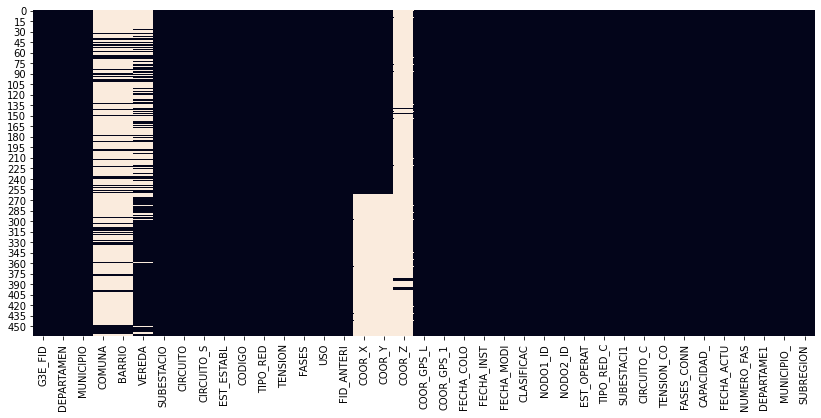

In [32]:
plt.figure(figsize=(14,6))
sns.heatmap(CUCHILL_OP.isna(), cbar=False)

In [33]:
CUCHILL_OP.columns

Index(['G3E_FID', 'DEPARTAMEN', 'MUNICIPIO', 'COMUNA', 'BARRIO', 'VEREDA',
       'SUBESTACIO', 'CIRCUITO', 'CIRCUITO_S', 'EST_ESTABL', 'CODIGO',
       'TIPO_RED', 'TENSION', 'FASES', 'USO', 'FID_ANTERI', 'COOR_X', 'COOR_Y',
       'COOR_Z', 'COOR_GPS_L', 'COOR_GPS_1', 'FECHA_COLO', 'FECHA_INST',
       'FECHA_MODI', 'CLASIFICAC', 'NODO1_ID', 'NODO2_ID', 'EST_OPERAT',
       'TIPO_RED_C', 'SUBESTACI1', 'CIRCUITO_C', 'TENSION_CO', 'FASES_CONN',
       'CAPACIDAD_', 'FECHA_ACTU', 'NUMERO_FAS', 'DEPARTAME1', 'MUNICIPIO_',
       'SUBREGION'],
      dtype='object')

In [34]:
print('Is \"CIRCUITO\" equal to \"CIRCUITO_S\" variable?',(CUCHILL_OP.CIRCUITO == CUCHILL_OP.CIRCUITO_S).all())
print('Is \"CIRCUITO\" equal to \"CIRCUITO_C\" variable?',(CUCHILL_OP.CIRCUITO == CUCHILL_OP.CIRCUITO_C).all())
print('Is \"TIPO_RED\" equal to \"TIPO_RED_C\" variable?',(CUCHILL_OP.TIPO_RED == CUCHILL_OP.TIPO_RED_C).all())
print('Is \"TENSION\" equal to \"TENSION_CO\" variable?',(CUCHILL_OP.TENSION == CUCHILL_OP.TENSION_CO).all())
print('Is \"FASES\" equal to \"FASES_CONN\" variable?',(CUCHILL_OP.FASES == CUCHILL_OP.FASES_CONN).all())

Is "CIRCUITO" equal to "CIRCUITO_S" variable? False
Is "CIRCUITO" equal to "CIRCUITO_C" variable? True
Is "TIPO_RED" equal to "TIPO_RED_C" variable? True
Is "TENSION" equal to "TENSION_CO" variable? True
Is "FASES" equal to "FASES_CONN" variable? True


In [35]:
for var in CUCHILL_OP.columns:
    print('\n ---',var)
    print(CUCHILL_OP[var].value_counts())


 --- G3E_FID
12665851    1
13534595    1
12852584    1
12736880    1
12945777    1
           ..
12731092    1
14414549    1
12006104    1
21255900    1
14410938    1
Name: G3E_FID, Length: 465, dtype: int64

 --- DEPARTAMEN
ANTIOQUIA    465
Name: DEPARTAMEN, dtype: int64

 --- MUNICIPIO
TURBO                 142
APARTADÓ               90
CAREPA                 54
ARBOLETES              45
CHIGORODÓ              35
NECOCLÍ                34
SAN PEDRO DE URABÁ     31
MUTATÁ                 19
SAN JUAN DE URABÁ      15
Name: MUNICIPIO, dtype: int64

 --- COMUNA
APARTADÓ              33
TURBO                 23
CHIGORODÓ             11
NECOCLÍ                7
CAREPA                 5
ARBOLETES              4
SAN PEDRO DE URABÁ     3
Name: COMUNA, dtype: int64

 --- BARRIO
CHIGORODO               11
LA CHINITA               8
OBRERO                   7
FUNDADORES               7
SAN MARTIN               7
EL CENTRO                5
UNIBAN                   3
JESUS MORA               3
CE

In [36]:
CUCHILL_OP = CUCHILL_OP.drop(columns=['DEPARTAMEN', 'COMUNA', 'BARRIO', 'VEREDA', 'FID_ANTERI',
                                      'COOR_X', 'COOR_Y', 'COOR_Z', 'EST_OPERAT', 'DEPARTAME1',
                                      'CIRCUITO_C', 'TIPO_RED_C', 'TENSION_CO', 'FASES_CONN', 'CAPACIDAD_'] )

CUCHILL_OP.rename(columns={'COOR_GPS_L':'LATITUDE', 'COOR_GPS_1':'LONGITUDE', 
                           'MUNICIPIO_':'MUNICIPIO_CODE', 'CODIGO':'CUCHILL_CODE'}, inplace=True)

In [37]:
CUCHILL_OP.describe()

,G3E_FID,TENSION,LATITUDE,LONGITUDE,NODO1_ID,NODO2_ID,MUNICIPIO_CODE
count,4.650000e+02,465.000000,465.000000,465.000000,4.650000e+02,4.650000e+02,465.000000
mean,1.375459e+07,16.234686,8.068228,-76.608302,5.574952e+07,5.707744e+07,5420.294624
std,3.733419e+06,10.268282,0.364399,0.117124,4.841448e+06,3.045481e+06,336.710407
min,6.001428e+06,7.621000,7.198050,-76.787050,0.000000e+00,4.714575e+07,5045.000000
25%,1.239086e+07,13.200000,7.851230,-76.690750,5.718550e+07,5.736578e+07,5051.000000
50%,1.309267e+07,13.200000,7.938240,-76.635020,5.742646e+07,5.756775e+07,5480.000000
75%,1.429550e+07,13.200000,8.285380,-76.534380,5.784733e+07,5.795406e+07,5837.000000
max,3.129308e+07,44.000000,8.852970,-76.263870,7.076215e+07,7.076249e+07,5837.000000


In [38]:
print(CUCHILL_OP.G3E_FID.value_counts().value_counts())
print(CUCHILL_OP.CUCHILL_CODE.value_counts().value_counts())

1    465
Name: G3E_FID, dtype: int64
1    465
Name: CUCHILL_CODE, dtype: int64


In [39]:
CUCHILL_OP[['FECHA_ACTU','FECHA_COLO','FECHA_INST','FECHA_MODI']] = CUCHILL_OP[['FECHA_ACTU','FECHA_COLO','FECHA_INST','FECHA_MODI']].\
                                                                    apply(pd.to_datetime)

In [40]:
CUCHILL_OP.isnull().sum()

G3E_FID           0
MUNICIPIO         0
SUBESTACIO        0
CIRCUITO          0
CIRCUITO_S        0
EST_ESTABL        0
CUCHILL_CODE      0
TIPO_RED          0
TENSION           0
FASES             0
USO               0
LATITUDE          0
LONGITUDE         0
FECHA_COLO        0
FECHA_INST        0
FECHA_MODI        0
CLASIFICAC        0
NODO1_ID          0
NODO2_ID          0
SUBESTACI1        0
FECHA_ACTU        0
NUMERO_FAS        0
MUNICIPIO_CODE    0
SUBREGION         0
dtype: int64

### RECONEC_OP: ¿?

In [41]:
RECONEC_OP.dtypes

G3E_FID         int64
MUNICIPIO      object
COMUNA         object
BARRIO         object
VEREDA         object
UBICACION      object
SUBESTACIO     object
CIRCUITO       object
CIRCUITO_S     object
EST_ESTABL     object
CODIGO         object
TIPO_RED       object
TENSION       float64
FASES          object
CAPACIDAD_    float64
NRO_OPERAC      int64
MODELO         object
VALORES_PL     object
CORRIENTE1    float64
CURVAS_OPE     object
NRO_DISP_C    float64
NRO_DISP_1    float64
COMUNICACI     object
BIDIRECCIO     object
FID_ANTERI      int64
COOR_X        float64
COOR_Y        float64
COOR_Z        float64
COOR_GPS_L    float64
COOR_GPS_1    float64
FECHA_COLO     object
FECHA_MODI     object
JOB_COLOCA     object
DIRECCION      object
CLASIFICAC     object
NODO1_ID        int64
NODO2_ID        int64
EST_OPERAT     object
TIPO_RED_C     object
SUBESTACI1     object
CIRCUITO_C     object
TENSION_CO    float64
FASES_CONN     object
UBICACION_     object
FECHA_ACTU     object
MUNICIPIO_

In [42]:
RECONEC_OP.head()

,G3E_FID,MUNICIPIO,COMUNA,BARRIO,VEREDA,UBICACION,SUBESTACIO,CIRCUITO,CIRCUITO_S,EST_ESTABL,CODIGO,TIPO_RED,TENSION,FASES,CAPACIDAD_,NRO_OPERAC,MODELO,VALORES_PL,CORRIENTE1,CURVAS_OPE,NRO_DISP_C,NRO_DISP_1,COMUNICACI,BIDIRECCIO,FID_ANTERI,COOR_X,COOR_Y,COOR_Z,COOR_GPS_L,COOR_GPS_1,FECHA_COLO,FECHA_MODI,JOB_COLOCA,DIRECCION,CLASIFICAC,NODO1_ID,NODO2_ID,EST_OPERAT,TIPO_RED_C,SUBESTACI1,CIRCUITO_C,TENSION_CO,FASES_CONN,UBICACION_,FECHA_ACTU,MUNICIPIO_,SUBREGION
0,12074342,CHIGORODÓ,NaN,NaN,NaN,CHIGORODO,CHIGORODO,403-12,403-12,CLOSED,R813,PRIMARIA,13.200,SRT,630.0,4,EPR,15 kV\t630 A\t12.5 kA\r\n,800.0,DT(0.01) - IEC EI (0.1)\r\n,1.0,3.0,NO TIENE,NO,12074342,710960.707,1340974.198,NaN,7.67154,-76.69638,10/18/2008,6/9/2020,WO#82_GEADE,CHIGORODO,RURAL,57499751,57499752,CLOSED,PRIMARIA,CHIGORODO,403-12,13.200,SRT,12074342-5,4/5/2018,5172,APARTADO
1,12223211,CHIGORODÓ,NaN,NaN,LA FE,CHIGORODO,CHIGORODO,403-12,403-12,CLOSED,R4476,PRIMARIA,7.621,T,400.0,0,W27-06,15 kV\t400 A\t6 kA\r\n,0.0,NaN,NaN,NaN,NO TIENE,NO,12223211,710582.375,1340481.720,NaN,7.66703,-76.69976,9/1/2009,6/9/2020,rural_GEADE,CHIGORODO,RURAL,57391577,57391582,CLOSED,PRIMARIA,CHIGORODO,403-12,7.621,T,12223211-5,4/5/2018,5172,APARTADO
2,12265633,TURBO,NaN,NaN,NaN,TURBO,NUEVA COLONIA,406-11,406-11,CLOSED,R792,PRIMARIA,13.200,RST,630.0,4,EPR,15 kV\t630 A\t12.5 kA\r\n,800.0,DT(0.01) - IEC EI (0.1)\r\n,2.0,2.0,NO TIENE,NO,12265633,710987.243,1370238.398,NaN,7.93587,-76.69778,10/27/2009,6/9/2020,WO#116_GEADE,TURBO,RURAL,57492468,57492469,CLOSED,PRIMARIA,NUEVA COLONIA,406-11,13.200,RST,12265633-5,4/16/2018,5837,TURBO
3,12275085,TURBO,NaN,NaN,NaN,NaN,NUEVA COLONIA,406-11,406-11,CLOSED,R1470,PRIMARIA,13.200,RST,630.0,4,FORM 5,15 kV\t630 A\t12.5 kA\r\n,800.0,DT(0.01) - IEC EI (0.1)\r\n,1.0,3.0,NO TIENE,NO,12275085,715006.822,1370214.812,NaN,7.93589,-76.66137,11/11/2009,6/9/2020,WO#116_GEADE,NaN,RURAL,57507917,57386607,CLOSED,PRIMARIA,NUEVA COLONIA,406-11,13.200,RST,12275085-5,4/16/2018,5837,TURBO
4,12282763,SAN JUAN DE URABÁ,NaN,NaN,SUBTERRANEO,SAN JUAN DE URABA SALIDA,ARBOLETES,409-12,409-12,CLOSED,R499,PRIMARIA,13.200,RST,630.0,4,EPR,15 kV\t630 A\t12.5 kA\r\n,300.0,DT(0.01) - IEC EI (0.2)\r\n,1.0,3.0,NO TIENE,NO,12282763,729384.623,1459989.799,NaN,8.75200,-76.53442,11/23/2009,6/9/2020,WO#116_GEADE,SAN JUAN DE URABA SALIDA,RURAL,57420369,57420371,CLOSED,PRIMARIA,ARBOLETES,409-12,13.200,RST,12282763-5,4/13/2018,5659,TURBO


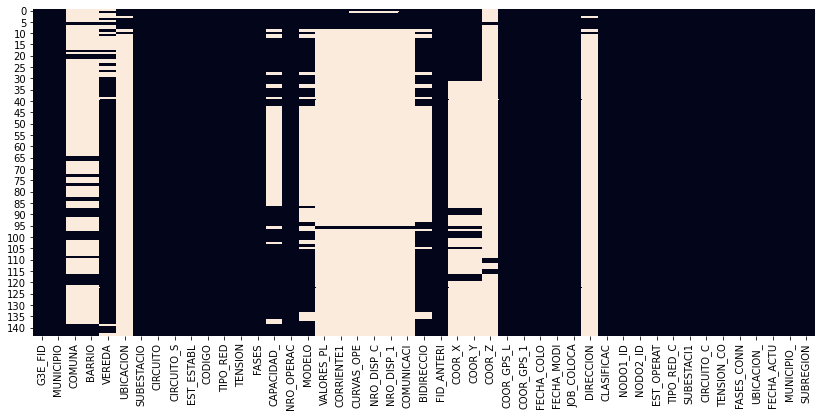

In [43]:
plt.figure(figsize=(14,6))
sns.heatmap(RECONEC_OP.isna(),cbar=False)

In [44]:
print('Is \"CIRCUITO\" equal to \"CIRCUITO_S\" variable?',(RECONEC_OP.CIRCUITO == RECONEC_OP.CIRCUITO_S).all())
print('Is \"CIRCUITO\" equal to \"CIRCUITO_C\" variable?',(RECONEC_OP.CIRCUITO == RECONEC_OP.CIRCUITO_C).all())
print('Is \"TIPO_RED\" equal to \"TIPO_RED_C\" variable?',(RECONEC_OP.TIPO_RED == RECONEC_OP.TIPO_RED_C).all())
print('Is \"TENSION\" equal to \"TENSION_CO\" variable?',(RECONEC_OP.TENSION == RECONEC_OP.TENSION_CO).all())
print('Is \"FASES\" equal to \"FASES_CONN\" variable?',(RECONEC_OP.FASES == RECONEC_OP.FASES_CONN).all())
print('Is \"SUBESTACIO\" equal to \"SUBESTACI1\" variable?',(RECONEC_OP.SUBESTACIO == RECONEC_OP.SUBESTACI1).all())

Is "CIRCUITO" equal to "CIRCUITO_S" variable? False
Is "CIRCUITO" equal to "CIRCUITO_C" variable? True
Is "TIPO_RED" equal to "TIPO_RED_C" variable? True
Is "TENSION" equal to "TENSION_CO" variable? True
Is "FASES" equal to "FASES_CONN" variable? True
Is "SUBESTACIO" equal to "SUBESTACI1" variable? True


In [45]:
for var in RECONEC_OP.columns:
    print('\n ---', var)
    print(RECONEC_OP[var].value_counts())


 --- G3E_FID
21200952    1
14065656    1
21275481    1
13967124    1
21345591    1
           ..
13965234    1
14010289    1
21239308    1
21257480    1
13182209    1
Name: G3E_FID, Length: 144, dtype: int64

 --- MUNICIPIO
TURBO                 41
ARBOLETES             23
NECOCLÍ               18
SAN PEDRO DE URABÁ    16
APARTADÓ              14
CAREPA                11
CHIGORODÓ             11
SAN JUAN DE URABÁ      5
MUTATÁ                 5
Name: MUNICIPIO, dtype: int64

 --- COMUNA
TURBO                 8
APARTADÓ              6
SAN PEDRO DE URABÁ    5
ARBOLETES             5
NECOCLÍ               3
CHIGORODÓ             2
Name: COMUNA, dtype: int64

 --- BARRIO
MIRA MAR       5
ZOILA LOPEZ    5
PARROQUIAL     3
SAN MARTIN     3
JESUS MORA     2
CHIGORODO      2
LA CHINITA     2
VELEZ          1
VERANILLO      1
UNIBAN         1
FUNDADORES     1
SIN NOMBRE     1
EL CENTRO      1
OBRERO         1
Name: BARRIO, dtype: int64

 --- VEREDA
ATOYOSA               6
BAJO GRANDE          

 --- NODO2_ID
57946829    1
58678269    1
57944677    1
57929060    1
57500003    1
           ..
58010786    1
57981857    1
57987947    1
57788318    1
57439851    1
Name: NODO2_ID, Length: 144, dtype: int64

 --- EST_OPERAT
CLOSED    144
Name: EST_OPERAT, dtype: int64

 --- TIPO_RED_C
PRIMARIA          135
SUBTRANSMISION      9
Name: TIPO_RED_C, dtype: int64

 --- SUBESTACI1
S.PEDRO URABA    18
LA ATOYOSA       17
NECOCLI          16
APARTADO         15
URABA            14
ARBOLETES        13
CHIGORODO        12
NUEVA COLONIA     9
TURBO             8
CAREPA            7
CAUCHERAS         6
PUEBLO BELLO      5
CIRILO            2
ZUNGO             2
Name: SUBESTACI1, dtype: int64

 --- CIRCUITO_C
407-12    9
415-12    8
414-11    8
409-12    6
406-11    5
403-16    5
411-13    5
410-11    5
414-12    5
401-11    5
415-13    5
414-13    4
407-11    4
409-11    4
411-11    4
403-12    4
412-14    3
407-13    3
415-11    3
404-11    3
406-12    3
404-12    3
412-13    2
412-11    2
402

In [46]:
RECONEC_OP.columns

Index(['G3E_FID', 'MUNICIPIO', 'COMUNA', 'BARRIO', 'VEREDA', 'UBICACION',
       'SUBESTACIO', 'CIRCUITO', 'CIRCUITO_S', 'EST_ESTABL', 'CODIGO',
       'TIPO_RED', 'TENSION', 'FASES', 'CAPACIDAD_', 'NRO_OPERAC', 'MODELO',
       'VALORES_PL', 'CORRIENTE1', 'CURVAS_OPE', 'NRO_DISP_C', 'NRO_DISP_1',
       'COMUNICACI', 'BIDIRECCIO', 'FID_ANTERI', 'COOR_X', 'COOR_Y', 'COOR_Z',
       'COOR_GPS_L', 'COOR_GPS_1', 'FECHA_COLO', 'FECHA_MODI', 'JOB_COLOCA',
       'DIRECCION', 'CLASIFICAC', 'NODO1_ID', 'NODO2_ID', 'EST_OPERAT',
       'TIPO_RED_C', 'SUBESTACI1', 'CIRCUITO_C', 'TENSION_CO', 'FASES_CONN',
       'UBICACION_', 'FECHA_ACTU', 'MUNICIPIO_', 'SUBREGION'],
      dtype='object')

In [47]:
RECONEC_OP = RECONEC_OP.drop(columns=['COMUNA', 'BARRIO', 'VEREDA', 'UBICACION', 'CAPACIDAD_', 'MODELO',
                                     'VALORES_PL', 'CORRIENTE1', 'CURVAS_OPE', 'NRO_DISP_C', 'NRO_DISP_1',
                                     'COMUNICACI', 'BIDIRECCIO', 'FID_ANTERI', 'COOR_X', 'COOR_Y', 'COOR_Z',
                                     'TIPO_RED_C', 'SUBESTACI1', 'CIRCUITO_C', 'TENSION_CO', 'FASES_CONN',
                                     'DIRECCION', 'NRO_OPERAC', 'JOB_COLOCA', 'EST_OPERAT'] )

RECONEC_OP.rename(columns={'COOR_GPS_L':'LATITUDE', 'COOR_GPS_1':'LONGITUDE', 
                           'MUNICIPIO_':'MUNICIPIO_CODE', 'CODIGO':'RECONEC_CODE'}, inplace=True)

In [48]:
RECONEC_OP.describe()

,G3E_FID,TENSION,LATITUDE,LONGITUDE,NODO1_ID,NODO2_ID,MUNICIPIO_CODE
count,1.440000e+02,144.000000,144.000000,144.000000,1.440000e+02,1.440000e+02,144.000000
mean,1.512402e+07,13.509306,8.172398,-76.580279,5.700113e+07,5.769742e+07,5449.888889
std,3.009767e+06,8.053164,0.395715,0.133982,3.153483e+06,1.551493e+06,323.333038
min,1.207434e+07,7.621000,7.239030,-76.806610,4.763289e+07,4.767454e+07,5045.000000
25%,1.344613e+07,7.621000,7.883793,-76.698275,5.739845e+07,5.749394e+07,5051.000000
50%,1.406548e+07,13.200000,8.180175,-76.624925,5.779711e+07,5.783954e+07,5490.000000
75%,1.438754e+07,13.200000,8.490340,-76.437692,5.796451e+07,5.796675e+07,5837.000000
max,2.135935e+07,44.000000,8.849730,-76.285610,7.075188e+07,7.075189e+07,5837.000000


In [49]:
print(RECONEC_OP.G3E_FID.value_counts().value_counts())
print(RECONEC_OP.RECONEC_CODE.value_counts().value_counts())

1    144
Name: G3E_FID, dtype: int64
1    144
Name: RECONEC_CODE, dtype: int64


### TRANSFO_PT: Transformadores

In [50]:
TRANSFO_PT.dtypes

G3E_FID         int64
COMUNA         object
REGION         object
GRUPO         float64
LOCALIZACI     object
SUBESTACIO     object
CIRCUITO       object
TIPO_RED       object
TENSION       float64
TENSION_SE     object
TENSION_CR      int64
CAPACIDAD_    float64
FASES          object
NRO_TRANSF      int64
NODO_TRANS      int64
MUNICIPIO      object
BARRIO         object
FABRICANTE     object
FID_ANTERI    float64
COOR_X        float64
COOR_Y        float64
COOR_Z        float64
COOR_GPS_L    float64
COOR_GPS_1    float64
FECHA_COLO     object
FECHA_INST     object
FECHA_MODI     object
FECHA_ACTU     object
CLASIFICAC     object
NODO1_ID        int64
NODO2_ID        int64
NODO_TRAN1      int64
TENSION_S1     object
TIPO_RED_C     object
SUBESTACI1     object
LOCALIZAC1     object
CIRCUITO_C     object
CIRCUITO_S     object
TENSION_CO    float64
FASES_CONN     object
UBICACION_      int64
NUMERO_FAS     object
MUNICIPIO_      int64
SUBREGION      object
dtype: object

In [51]:
TRANSFO_PT.head()

,G3E_FID,COMUNA,REGION,GRUPO,LOCALIZACI,SUBESTACIO,CIRCUITO,TIPO_RED,TENSION,TENSION_SE,TENSION_CR,CAPACIDAD_,FASES,NRO_TRANSF,NODO_TRANS,MUNICIPIO,BARRIO,FABRICANTE,FID_ANTERI,COOR_X,COOR_Y,COOR_Z,COOR_GPS_L,COOR_GPS_1,FECHA_COLO,FECHA_INST,FECHA_MODI,FECHA_ACTU,CLASIFICAC,NODO1_ID,NODO2_ID,NODO_TRAN1,TENSION_S1,TIPO_RED_C,SUBESTACI1,LOCALIZAC1,CIRCUITO_C,CIRCUITO_S,TENSION_CO,FASES_CONN,UBICACION_,NUMERO_FAS,MUNICIPIO_,SUBREGION
0,7001338,NaN,URABA,NaN,AEREO,S.PEDRO URABA,407-12,PRIMARIA,7.621,120/240,1,15.0,S,477213,477213,SAN PEDRO DE URABÁ,NaN,SIN CARGAR,7001338.0,748442.573,1410921.854,NaN,8.30547,-76.36065,1/23/2008,1/23/2008,6/28/2019,4/16/2018,RURAL,47674497,57745411,477213,120/240,PRIMARIA,S.PEDRO URABA,AEREO,407-12,410-11,7.621,S,477213,1F,5665,TURBO
1,7001669,NaN,URABA,NaN,AEREO,TURBO,402-13,PRIMARIA,7.621,240/120,1,10.0,T,418251,418251,TURBO,NaN,SIEMENS,7001669.0,707665.735,1389343.446,NaN,8.10824,-76.72899,1/23/2008,1/23/2008,1/16/2020,4/5/2018,RURAL,57403494,57680127,418251,240/120,PRIMARIA,TURBO,AEREO,402-13,402-13,7.621,T,418251,1F,5837,TURBO
2,7001671,NaN,URABA,NaN,AEREO,TURBO,402-13,PRIMARIA,7.621,240/120,1,25.0,S,70632,418240,TURBO,NaN,RYMEL,7001671.0,708558.386,1389911.777,NaN,8.11375,-76.72101,1/23/2008,7/10/2015,1/16/2020,4/5/2018,RURAL,57680296,57282032,418240,240/120,PRIMARIA,TURBO,AEREO,402-13,402-13,7.621,S,418240,1F,5837,TURBO
3,7001672,NaN,URABA,NaN,AEREO,TURBO,402-13,PRIMARIA,7.621,240/120,1,25.0,T,418241,418241,TURBO,NaN,SIEMENS,7001672.0,709063.248,1390130.096,NaN,8.11543,-76.71637,1/23/2008,1/23/2008,4/1/2020,4/5/2018,RURAL,53148542,0,418241,240/120,PRIMARIA,TURBO,AEREO,402-13,402-13,7.621,T,418241,1F,5837,TURBO
4,7001675,NaN,URABA,NaN,AEREO,TURBO,402-13,PRIMARIA,7.621,120/240,1,37.5,R,405083,405083,TURBO,NaN,SIN CARGAR,7001675.0,711395.941,1390626.274,NaN,8.12003,-76.69498,1/23/2008,1/23/2008,4/1/2019,4/5/2018,RURAL,57719671,57719670,405083,120/240,PRIMARIA,TURBO,AEREO,402-13,402-13,7.621,R,405083,1F,5837,TURBO


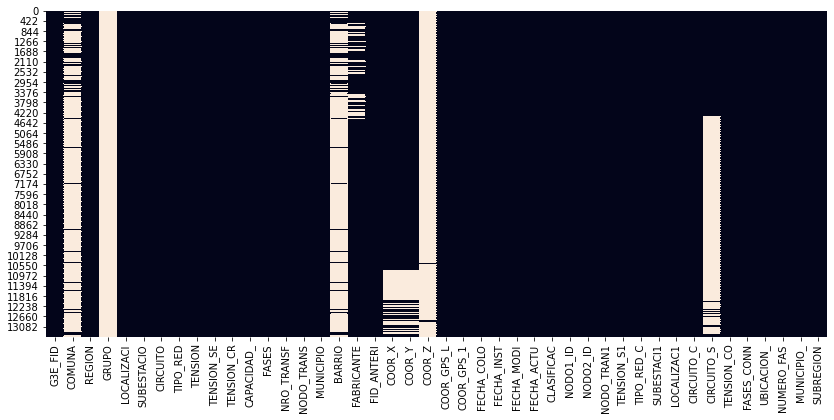

In [52]:
plt.figure(figsize=(14,6))
sns.heatmap(TRANSFO_PT.isna(), cbar=False)

In [53]:
print('Is \"CIRCUITO\" equal to \"CIRCUITO_S\" variable?',(TRANSFO_PT.CIRCUITO == TRANSFO_PT.CIRCUITO_S).all())
print('Is \"CIRCUITO\" equal to \"CIRCUITO_C\" variable?',(TRANSFO_PT.CIRCUITO == TRANSFO_PT.CIRCUITO_C).all())
print('Is \"TIPO_RED\" equal to \"TIPO_RED_C\" variable?',(TRANSFO_PT.TIPO_RED == TRANSFO_PT.TIPO_RED_C).all())
print('Is \"TENSION\" equal to \"TENSION_CO\" variable?',(TRANSFO_PT.TENSION == TRANSFO_PT.TENSION_CO).all())
print('Is \"TENSION\" equal to \"TENSION_CR\" variable?',(TRANSFO_PT.TENSION == TRANSFO_PT.TENSION_CR).all())
print('Is \"FASES\" equal to \"FASES_CONN\" variable?',(TRANSFO_PT.FASES == TRANSFO_PT.FASES_CONN).all())
print('Is \"SUBESTACIO\" equal to \"SUBESTACI1\" variable?',(TRANSFO_PT.SUBESTACIO == TRANSFO_PT.SUBESTACI1).all())
print('Is \"LOCALIZACI\" equal to \"LOCALIZAC1\" variable?',(TRANSFO_PT.LOCALIZACI == TRANSFO_PT.LOCALIZAC1).all())
print('Is \"NODO_TRANS\" equal to \"NODO_TRAN1\" variable?',(TRANSFO_PT.NODO_TRANS == TRANSFO_PT.NODO_TRAN1).all())

Is "CIRCUITO" equal to "CIRCUITO_S" variable? False
Is "CIRCUITO" equal to "CIRCUITO_C" variable? False
Is "TIPO_RED" equal to "TIPO_RED_C" variable? True
Is "TENSION" equal to "TENSION_CO" variable? False
Is "TENSION" equal to "TENSION_CR" variable? False
Is "FASES" equal to "FASES_CONN" variable? False
Is "SUBESTACIO" equal to "SUBESTACI1" variable? False
Is "LOCALIZACI" equal to "LOCALIZAC1" variable? False
Is "NODO_TRANS" equal to "NODO_TRAN1" variable? False


In [54]:
for var in TRANSFO_PT.columns:
    print('\n ---', var)
    print(TRANSFO_PT[var].value_counts())


 --- G3E_FID
13240319    1
7115463     1
12172034    1
12752896    1
7017542     1
           ..
12838358    1
12352981    1
12480593    1
21352471    1
14090240    1
Name: G3E_FID, Length: 13503, dtype: int64

 --- COMUNA
APARTADÓ              776
TURBO                 573
CHIGORODÓ             313
CAREPA                208
NECOCLÍ                91
ARBOLETES              87
SAN PEDRO DE URABÁ     83
Name: COMUNA, dtype: int64

 --- REGION
URABA        13501
OCCIDENTE        1
Name: REGION, dtype: int64

 --- GRUPO
Series([], Name: GRUPO, dtype: int64)

 --- LOCALIZACI
AEREO          13410
SUBTERRANEO       92
Name: LOCALIZACI, dtype: int64

 --- SUBESTACIO
S.PEDRO URABA    1845
NECOCLI          1654
LA ATOYOSA       1625
URABA            1404
APARTADO         1329
CHIGORODO        1298
CAREPA           1000
ARBOLETES         882
TURBO             734
CAUCHERAS         557
NUEVA COLONIA     467
PUEBLO BELLO      376
ZUNGO             198
CIRILO            130
DABEIBA             2
TA

Name: FASES_CONN, dtype: int64

 --- UBICACION_
494006    2
919551    1
904012    1
916346    1
914285    1
         ..
405055    1
835133    1
833084    1
921147    1
819200    1
Name: UBICACION_, Length: 13502, dtype: int64

 --- NUMERO_FAS
1F    12747
3F      723
2F       33
Name: NUMERO_FAS, dtype: int64

 --- MUNICIPIO_
5837     3685
5490     2180
5045     1763
5051     1317
5665     1298
5172     1144
5147      964
5659      631
5480      518
27615       3
Name: MUNICIPIO_, dtype: int64

 --- SUBREGION
TURBO       9075
APARTADO    4427
FRONTINO       1
Name: SUBREGION, dtype: int64


In [55]:
TRANSFO_PT.columns

Index(['G3E_FID', 'COMUNA', 'REGION', 'GRUPO', 'LOCALIZACI', 'SUBESTACIO',
       'CIRCUITO', 'TIPO_RED', 'TENSION', 'TENSION_SE', 'TENSION_CR',
       'CAPACIDAD_', 'FASES', 'NRO_TRANSF', 'NODO_TRANS', 'MUNICIPIO',
       'BARRIO', 'FABRICANTE', 'FID_ANTERI', 'COOR_X', 'COOR_Y', 'COOR_Z',
       'COOR_GPS_L', 'COOR_GPS_1', 'FECHA_COLO', 'FECHA_INST', 'FECHA_MODI',
       'FECHA_ACTU', 'CLASIFICAC', 'NODO1_ID', 'NODO2_ID', 'NODO_TRAN1',
       'TENSION_S1', 'TIPO_RED_C', 'SUBESTACI1', 'LOCALIZAC1', 'CIRCUITO_C',
       'CIRCUITO_S', 'TENSION_CO', 'FASES_CONN', 'UBICACION_', 'NUMERO_FAS',
       'MUNICIPIO_', 'SUBREGION'],
      dtype='object')

In [56]:
TRANSFO_PT = TRANSFO_PT.drop(columns= ['COMUNA', 'GRUPO', 'BARRIO', 'FID_ANTERI', 'COOR_X', 'COOR_Y',
                                       'COOR_Z', 'TENSION_SE', 'TENSION_S1', 'UBICACION_', 'TIPO_RED_C']  )
TRANSFO_PT.rename(columns={'COOR_GPS_L':'LATITUDE', 'COOR_GPS_1':'LONGITUDE', 
                           'MUNICIPIO_':'MUNICIPIO_CODE', 'NRO_TRANSF':'TRANSF_CODE'}, inplace=True)

In [57]:
TRANSFO_PT.describe()

,G3E_FID,TENSION,TENSION_CR,CAPACIDAD_,TRANSF_CODE,NODO_TRANS,LATITUDE,LONGITUDE,NODO1_ID,NODO2_ID,NODO_TRAN1,TENSION_CO,MUNICIPIO_CODE
count,1.350300e+04,13503.000000,13503.000000,13503.000000,13503.000000,13503.000000,13503.000000,13503.000000,1.350300e+04,1.350300e+04,13503.000000,13503.000000,13503.000000
mean,1.144271e+07,7.956164,1.006591,19.531325,210258.267496,740881.777531,8.150791,-76.580663,5.585559e+07,4.058069e+07,740882.338295,7.956164,5461.601644
std,3.837755e+06,1.608581,0.082731,48.820217,159763.727237,224288.623911,0.374950,0.136084,3.459521e+06,2.621827e+07,224287.982978,1.608581,454.671801
min,7.001338e+06,7.621000,1.000000,0.500000,10198.000000,10657.000000,7.187350,-76.967030,4.763222e+07,0.000000e+00,10657.000000,7.621000,5045.000000
25%,7.115780e+06,7.621000,1.000000,3.000000,86285.000000,478148.000000,7.875500,-76.678930,5.719105e+07,0.000000e+00,478148.000000,7.621000,5147.000000
50%,1.241418e+07,7.621000,1.000000,5.000000,114480.000000,901326.000000,8.134670,-76.613780,5.732990e+07,5.726744e+07,901326.000000,7.621000,5490.000000
75%,1.299988e+07,7.621000,1.000000,25.000000,400354.500000,920267.500000,8.469290,-76.490180,5.744568e+07,5.750336e+07,920267.500000,7.621000,5837.000000
max,3.132718e+07,44.000000,3.000000,3000.000000,701198.000000,938714.000000,8.871280,-76.193050,7.076268e+07,7.076273e+07,938714.000000,44.000000,27615.000000


In [58]:
print(TRANSFO_PT.G3E_FID.value_counts().value_counts())
print(TRANSFO_PT.TRANSF_CODE.value_counts().value_counts())

1    13503
Name: G3E_FID, dtype: int64
1    13503
Name: TRANSF_CODE, dtype: int64


## Review structure

In [59]:
print('AISLADE_OP:', AISLADE_OP.shape)
print('CON_PRI_OP: ', CON_PRI_OP.shape)
print('CUCHILL_OP: ', CUCHILL_OP.shape)
print('RECONEC_OP: ', RECONEC_OP.shape)
print('TRANSFO_PT: ',TRANSFO_PT.shape)

AISLADE_OP: (3871, 21)
CON_PRI_OP:  (44130, 24)
CUCHILL_OP:  (465, 24)
RECONEC_OP:  (144, 21)
TRANSFO_PT:  (13503, 33)


In [60]:
print('AISLADE_OP:', AISLADE_OP.columns)
print('CON_PRI_OP: ', CON_PRI_OP.columns)
print('CUCHILL_OP: ', CUCHILL_OP.columns)
print('RECONEC_OP: ', RECONEC_OP.columns)
print('TRANSFO_PT: ',TRANSFO_PT.columns)

AISLADE_OP: Index(['G3E_FID', 'MUNICIPIO', 'SUBESTACIO', 'CIRCUITO', 'CIRCUITO_S',
       'EST_ESTABL', 'TIPO_AISLA', 'TIPO_RED', 'TENSION', 'FASES', 'LATITUDE',
       'LONGITUDE', 'FECHA_COLO', 'FECHA_MODI', 'CLASIFICAC', 'NODO1_ID',
       'NODO2_ID', 'FECHA_ACTU', 'NUMERO_FAS', 'MUNICIPIO_CODE', 'SUBREGION'],
      dtype='object')
CON_PRI_OP:  Index(['G3E_FID', 'MUNICIPIO', 'SUBESTACIO', 'LOCALIZACI', 'CIRCUITO',
       'TIPO_RED', 'TENSION', 'FASES', 'CALIBRE', 'MATERIAL', 'AISLAMIENT',
       'USO', 'CALIBRE_NE', 'SOBREPUEST', 'FECHA_COLO', 'FECHA_INST',
       'FECHA_MODI', 'CLASIFICAC', 'NODO1_ID', 'NODO2_ID', 'CIRCUITO_C',
       'TIPO_LINEA', 'LONGITUD_C', 'FECHA_ACTU'],
      dtype='object')
CUCHILL_OP:  Index(['G3E_FID', 'MUNICIPIO', 'SUBESTACIO', 'CIRCUITO', 'CIRCUITO_S',
       'EST_ESTABL', 'CUCHILL_CODE', 'TIPO_RED', 'TENSION', 'FASES', 'USO',
       'LATITUDE', 'LONGITUDE', 'FECHA_COLO', 'FECHA_INST', 'FECHA_MODI',
       'CLASIFICAC', 'NODO1_ID', 'NODO2_ID', 'SUBESTAC

In [63]:
# Info in Circuit level
print('\n AISLADE_OP')
display(AISLADE_OP.groupby('CIRCUITO').agg(lambda y: len(y.unique())).agg([max, 'mean']))

print('\n CON_PRI_OP')
display(CON_PRI_OP.groupby('CIRCUITO').agg(lambda y: len(y.unique())).agg([max, 'mean']))

print('\n CUCHILL_OP')
display(CUCHILL_OP.groupby('CIRCUITO').agg(lambda y: len(y.unique())).agg([max, 'mean']))

print('\n RECONEC_OP')
display(RECONEC_OP.groupby('CIRCUITO').agg(lambda y: len(y.unique())).agg([max, 'mean']))

print('\n TRANSFO_PT')
display(TRANSFO_PT.groupby('CIRCUITO').agg(lambda y: len(y.unique())).agg([max, 'mean']))


 AISLADE_OP


,G3E_FID,MUNICIPIO,SUBESTACIO,CIRCUITO_S,EST_ESTABL,TIPO_AISLA,TIPO_RED,TENSION,FASES,LATITUDE,LONGITUDE,FECHA_COLO,FECHA_MODI,CLASIFICAC,NODO1_ID,NODO2_ID,FECHA_ACTU,NUMERO_FAS,MUNICIPIO_CODE,SUBREGION
max,343.000000,4.00000,2.000000,3.00000,2.000000,4.000000,1.0,2.000000,10.000000,331.000000,330.000000,122.00000,53.000000,2.00000,321.000000,343.0,10.000000,3.000000,4.00000,2.000000
mean,73.037736,1.45283,1.056604,1.09434,1.528302,1.509434,1.0,1.886792,5.584906,69.358491,69.358491,36.45283,14.981132,1.45283,68.584906,73.0,3.886792,2.339623,1.45283,1.037736



 CON_PRI_OP


,G3E_FID,MUNICIPIO,SUBESTACIO,LOCALIZACI,TIPO_RED,TENSION,FASES,CALIBRE,MATERIAL,AISLAMIENT,USO,CALIBRE_NE,SOBREPUEST,FECHA_COLO,FECHA_INST,FECHA_MODI,CLASIFICAC,NODO1_ID,NODO2_ID,CIRCUITO_C,TIPO_LINEA,LONGITUD_C,FECHA_ACTU
max,3460.000000,6.000000,2.000000,2.000000,1.0,2.000000,11.000000,8.000000,5.0,5.000000,2.000000,8.000000,3.000000,270.000000,218.000000,329.000000,2.0,3207.000000,3388.000000,1.0,37.00000,3254.000000,81.000000
mean,596.351351,1.675676,1.027027,1.635135,1.0,1.648649,4.783784,4.297297,3.0,3.013514,1.148649,3.932432,2.189189,58.932432,54.027027,49.851351,1.5,569.297297,588.662162,1.0,14.22973,570.054054,17.608108



 CUCHILL_OP


,G3E_FID,MUNICIPIO,SUBESTACIO,CIRCUITO_S,EST_ESTABL,CUCHILL_CODE,TIPO_RED,TENSION,FASES,USO,LATITUDE,LONGITUDE,FECHA_COLO,FECHA_INST,FECHA_MODI,CLASIFICAC,NODO1_ID,NODO2_ID,SUBESTACI1,FECHA_ACTU,NUMERO_FAS,MUNICIPIO_CODE,SUBREGION
max,24.0,3.000000,2.000000,4.000000,2.000000,24.0,1.0,2.000000,7.000000,2.000000,24.000000,24.000000,13.000000,15.000000,10.000000,2.000000,24.000000,24.000000,2.000000,7.000000,3.000000,3.000000,2.000000
mean,7.5,1.290323,1.048387,1.951613,1.790323,7.5,1.0,1.258065,2.209677,1.532258,7.258065,7.451613,5.806452,5.854839,4.241935,1.387097,7.193548,7.258065,1.048387,2.048387,1.370968,1.290323,1.032258



 RECONEC_OP


,G3E_FID,MUNICIPIO,SUBESTACIO,CIRCUITO_S,EST_ESTABL,RECONEC_CODE,TIPO_RED,TENSION,FASES,LATITUDE,LONGITUDE,FECHA_COLO,FECHA_MODI,CLASIFICAC,NODO1_ID,NODO2_ID,UBICACION_,FECHA_ACTU,MUNICIPIO_CODE,SUBREGION
max,9.000000,3.000000,1.0,2.000000,2.000000,9.000000,1.0,2.000000,5.000000,9.000000,9.000000,7.000000,4.00000,2.000000,9.000000,9.000000,9.000000,5.000000,3.000000,2.000000
mean,2.823529,1.254902,1.0,1.137255,1.137255,2.823529,1.0,1.372549,1.980392,2.803922,2.823529,2.627451,1.72549,1.235294,2.823529,2.823529,2.784314,1.745098,1.254902,1.019608



 TRANSFO_PT


,G3E_FID,REGION,LOCALIZACI,SUBESTACIO,TIPO_RED,TENSION,TENSION_CR,CAPACIDAD_,FASES,TRANSF_CODE,NODO_TRANS,MUNICIPIO,FABRICANTE,LATITUDE,LONGITUDE,FECHA_COLO,FECHA_INST,FECHA_MODI,FECHA_ACTU,CLASIFICAC,NODO1_ID,NODO2_ID,NODO_TRAN1,SUBESTACI1,LOCALIZAC1,CIRCUITO_C,CIRCUITO_S,TENSION_CO,FASES_CONN,NUMERO_FAS,MUNICIPIO_CODE,SUBREGION
max,1240.0,2.000000,3.000000,3.000000,1.0,2.000000,2.000000,20.000000,12.000000,1240.0,1240.0,4.000000,18.000000,1213.000000,1204.000000,245.0,342.000000,67.000000,83.000000,2.0,1236.000000,970.000000,1240.000000,3.0,3.000000,5.000000,13.000000,2.000000,12.000000,3.000000,5.000000,2.0
mean,192.9,1.028571,1.428571,1.157143,1.0,1.671429,1.442857,8.942857,4.642857,192.9,192.9,1.414286,7.928571,187.714286,188.314286,54.5,78.857143,21.928571,17.685714,1.4,189.357143,137.085714,192.885714,1.3,1.428571,1.385714,3.885714,1.671429,4.657143,1.957143,1.528571,1.1
